In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os
import random
from PIL import Image

# Download Dataset

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aryashah2k/breast-ultrasound-images-dataset")

print("Path to dataset files:", path)

Resuming download from 189792256 bytes (14629214 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/aryashah2k/breast-ultrasound-images-dataset?dataset_version_number=1 (189792256/204421470) bytes left.


100%|██████████| 195M/195M [00:19<00:00, 761kB/s]

Extracting files...


Path to dataset files: /home/azhar/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1


# Dataset

In [2]:
# Dataset path
path = '/home/azhar/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1'

In [3]:
os.listdir(path)

['Dataset_BUSI_with_GT']

In [4]:
dataset_dir = path + '/Dataset_BUSI_with_GT/'

In [5]:
os.listdir(dataset_dir)

['benign', 'normal', 'malignant']

# Prepare Data

Menyiapkan Dataset

1. Img => data image (np.array)
2. Mask => data mask (segmentation) (np.array)
3. Label => target

In [6]:
# Global Variable
data_dict = {
    'img': [],
    'mask': [],
    'label': [],
}

# Constanta
SIZE = 128

In [7]:
# Class Directory
benign_dir = dataset_dir + 'benign/'
malignant_dir = dataset_dir + 'malignant/'
normal_dir = dataset_dir + 'normal/'

## Benign

In [8]:
os.listdir(benign_dir)

['benign (414).png',
 'benign (244).png',
 'benign (347)_mask.png',
 'benign (262).png',
 'benign (135).png',
 'benign (314)_mask.png',
 'benign (87)_mask.png',
 'benign (224)_mask.png',
 'benign (359).png',
 'benign (185)_mask.png',
 'benign (254).png',
 'benign (14)_mask.png',
 'benign (211)_mask.png',
 'benign (243).png',
 'benign (428).png',
 'benign (89).png',
 'benign (46).png',
 'benign (381)_mask.png',
 'benign (179).png',
 'benign (341)_mask.png',
 'benign (118).png',
 'benign (78).png',
 'benign (213)_mask.png',
 'benign (132).png',
 'benign (8)_mask.png',
 'benign (284).png',
 'benign (247).png',
 'benign (79).png',
 'benign (180).png',
 'benign (264).png',
 'benign (15)_mask.png',
 'benign (37)_mask.png',
 'benign (193)_mask.png',
 'benign (272).png',
 'benign (42)_mask.png',
 'benign (137)_mask.png',
 'benign (349)_mask.png',
 'benign (203).png',
 'benign (303)_mask.png',
 'benign (186).png',
 'benign (49)_mask.png',
 'benign (280).png',
 'benign (325).png',
 'benign (37).

In [22]:
img1 = plt.imread(benign_dir + 'benign (121).png')
img2 = plt.imread(benign_dir + 'benign (78).png')
img3 = plt.imread(benign_dir + 'benign (132).png')

mask1 = plt.imread(benign_dir + 'benign (121)_mask.png')
mask2 = plt.imread(benign_dir + 'benign (78)_mask.png')
mask3 = plt.imread(benign_dir + 'benign (132)_mask.png')

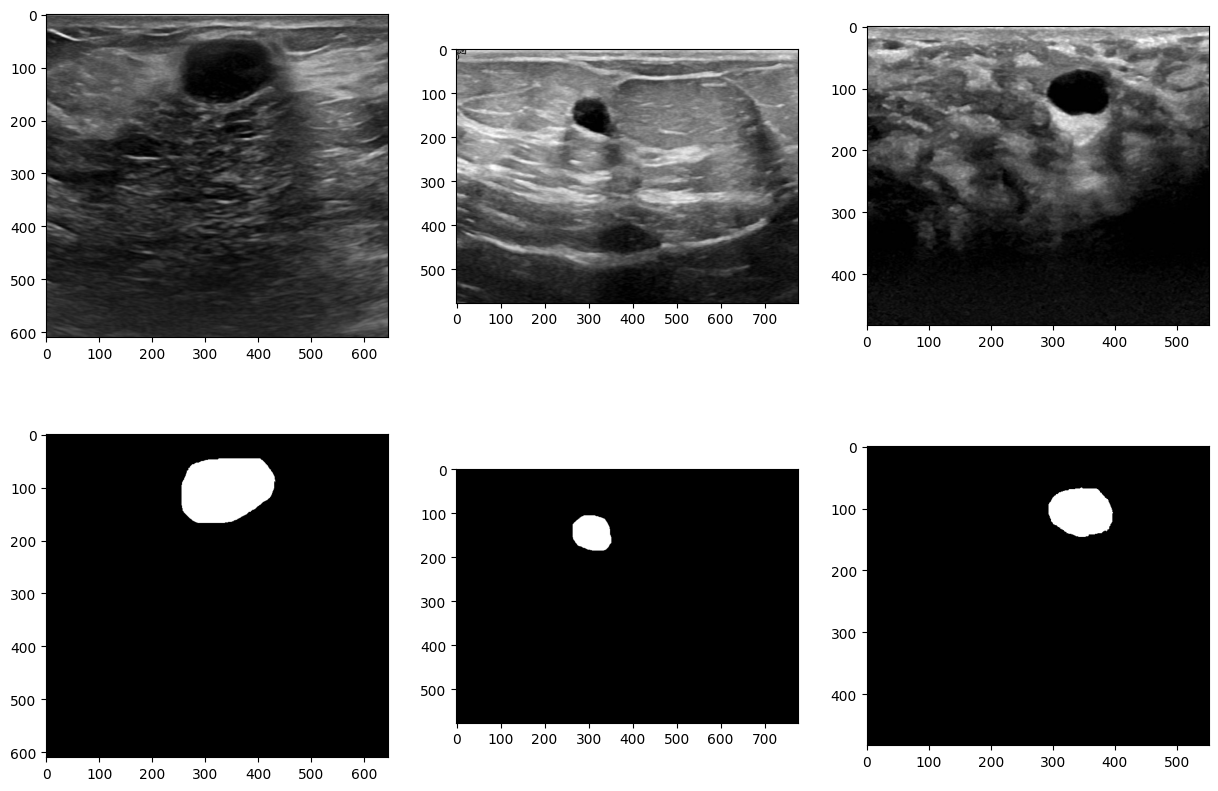

In [23]:
# Output sample from U-Net Architecture
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0,0].imshow(img1, cmap='grey')
ax[0,1].imshow(img2, cmap='grey')
ax[0,2].imshow(img3, cmap='grey')

ax[1,0].imshow(mask1, cmap='grey')
ax[1,1].imshow(mask2, cmap='grey')
ax[1,2].imshow(mask3, cmap='grey')

In [25]:
# 1. Store image names
# Get all the file names
benign_data_list = os.listdir(benign_dir)

datas = []
for i in range(len(benign_data_list)):
    datas.append(benign_data_list[i].split(")")[0] + ')')

# Remove duplicate names
datas = list(set(datas))

In [26]:
print('Total Benign Data:', len(datas))

Total Benign Data: 437


In [27]:
# 2. Create Data
for x in range(len(datas)):
    # Image and Resize to 128x128
    img = plt.imread(benign_dir + datas[x] + '.png')
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (SIZE, SIZE))
    
    # Mask
    name_mask_files = [file for file in benign_data_list if file.startswith(datas[x] + '_mask')]
    # Merge Mask
    mask = np.zeros(shape=(SIZE, SIZE))
    for mask_file in name_mask_files:
        # print(mask_file)
        mask_img = plt.imread(benign_dir + mask_file)
        if len(mask_img.shape) > 2:
            mask_img = cv2.cvtColor(mask_img, cv2.COLOR_RGB2GRAY)
        mask_img = cv2.resize(mask_img, (SIZE, SIZE))
        mask = np.maximum(mask, mask_img)
    
    # Label
    label = 'benign'
    
    # Append Data
    data_dict['img'].append(img)
    data_dict['mask'].append(mask)
    data_dict['label'].append(label)

    # print(name_mask_files)

## Malignant

In [15]:
os.listdir(malignant_dir)

['malignant (156)_mask.png',
 'malignant (209)_mask.png',
 'malignant (38).png',
 'malignant (23).png',
 'malignant (172)_mask.png',
 'malignant (47)_mask.png',
 'malignant (200).png',
 'malignant (134)_mask.png',
 'malignant (103).png',
 'malignant (71).png',
 'malignant (87).png',
 'malignant (109).png',
 'malignant (170).png',
 'malignant (8).png',
 'malignant (105).png',
 'malignant (74).png',
 'malignant (63)_mask.png',
 'malignant (142).png',
 'malignant (182).png',
 'malignant (113).png',
 'malignant (1).png',
 'malignant (131)_mask.png',
 'malignant (163).png',
 'malignant (24)_mask.png',
 'malignant (66)_mask.png',
 'malignant (81).png',
 'malignant (191).png',
 'malignant (125)_mask.png',
 'malignant (6).png',
 'malignant (50).png',
 'malignant (70)_mask.png',
 'malignant (79).png',
 'malignant (196).png',
 'malignant (26)_mask.png',
 'malignant (123).png',
 'malignant (206)_mask.png',
 'malignant (64)_mask.png',
 'malignant (198)_mask.png',
 'malignant (128).png',
 'malignan

In [25]:
img1 = plt.imread(malignant_dir + 'malignant (163).png')
img2 = plt.imread(malignant_dir + 'malignant (113).png')
img3 = plt.imread(malignant_dir + 'malignant (182).png')

mask1 = plt.imread(malignant_dir + 'malignant (163)_mask.png')
mask2 = plt.imread(malignant_dir + 'malignant (113)_mask.png')
mask3 = plt.imread(malignant_dir + 'malignant (182)_mask.png')

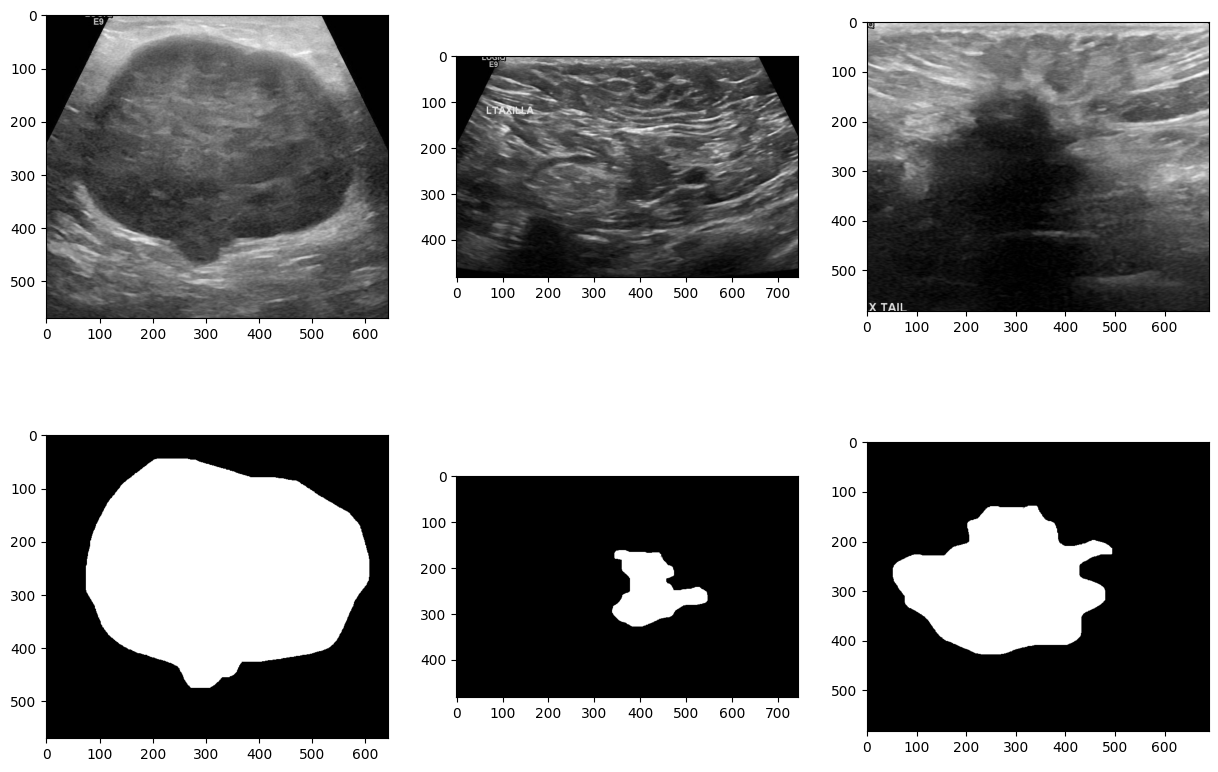

In [26]:
# Output sample from U-Net Architecture
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0,0].imshow(img1, cmap='grey')
ax[0,1].imshow(img2, cmap='grey')
ax[0,2].imshow(img3, cmap='grey')

ax[1,0].imshow(mask1, cmap='grey')
ax[1,1].imshow(mask2, cmap='grey')
ax[1,2].imshow(mask3, cmap='grey')

In [29]:
# 1. Store image names
# Get all the file names
malignant_data_list = os.listdir(malignant_dir)

datas = []
for i in range(len(malignant_data_list)):
    datas.append(malignant_data_list[i].split(")")[0] + ')')

# Remove duplicate names
datas = list(set(datas))

In [30]:
print('Total Malignant Data:', len(datas))

Total Malignant Data: 210


In [31]:
# 2. Create Data
for x in range(len(datas)):
    # Image and Resize to 128x128
    img = plt.imread(malignant_dir + datas[x] + '.png')
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (SIZE, SIZE))
    
    # Mask
    name_mask_files = [file for file in malignant_data_list if file.startswith(datas[x] + '_mask')]
    # Merge Mask
    mask = np.zeros(shape=(SIZE, SIZE))
    for mask_file in name_mask_files:
        # print(mask_file)
        mask_img = plt.imread(malignant_dir + mask_file)
        if len(mask_img.shape) > 2:
            mask_img = cv2.cvtColor(mask_img, cv2.COLOR_RGB2GRAY)
        mask_img = cv2.resize(mask_img, (SIZE, SIZE))
        mask = np.maximum(mask, mask_img)
    
    # Label
    label = 'malignant'
    
    # Append Data
    data_dict['img'].append(img)
    data_dict['mask'].append(mask)
    data_dict['label'].append(label)

    # print(name_mask_files)

## Normal

In [19]:
os.listdir(normal_dir)

['normal (113).png',
 'normal (117).png',
 'normal (46).png',
 'normal (19).png',
 'normal (83)_mask.png',
 'normal (20).png',
 'normal (87).png',
 'normal (49).png',
 'normal (21)_mask.png',
 'normal (96).png',
 'normal (73)_mask.png',
 'normal (5).png',
 'normal (122)_mask.png',
 'normal (36).png',
 'normal (131)_mask.png',
 'normal (30).png',
 'normal (47).png',
 'normal (99).png',
 'normal (36)_mask.png',
 'normal (109)_mask.png',
 'normal (98)_mask.png',
 'normal (105)_mask.png',
 'normal (57)_mask.png',
 'normal (110)_mask.png',
 'normal (31).png',
 'normal (71)_mask.png',
 'normal (74)_mask.png',
 'normal (126).png',
 'normal (104).png',
 'normal (54).png',
 'normal (92).png',
 'normal (61).png',
 'normal (62).png',
 'normal (60).png',
 'normal (133)_mask.png',
 'normal (100).png',
 'normal (120).png',
 'normal (45)_mask.png',
 'normal (41)_mask.png',
 'normal (15)_mask.png',
 'normal (101)_mask.png',
 'normal (28)_mask.png',
 'normal (33)_mask.png',
 'normal (7).png',
 'normal 

In [28]:
img1 = plt.imread(normal_dir + 'normal (113).png')
img2 = plt.imread(normal_dir + 'normal (47).png')
img3 = plt.imread(normal_dir + 'normal (21).png')

mask1 = plt.imread(normal_dir + 'normal (113)_mask.png')
mask2 = plt.imread(normal_dir + 'normal (47)_mask.png')
mask3 = plt.imread(normal_dir + 'normal (21)_mask.png')

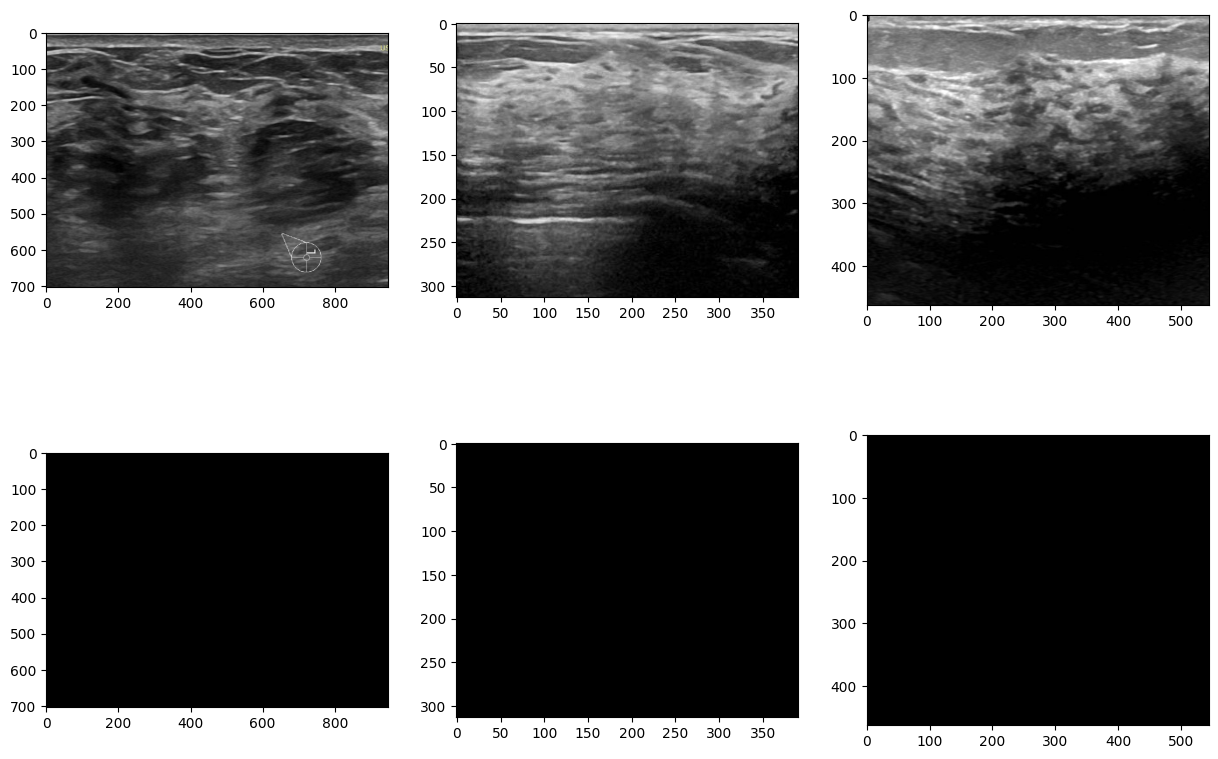

In [29]:
# Output sample from U-Net Architecture
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0,0].imshow(img1, cmap='grey')
ax[0,1].imshow(img2, cmap='grey')
ax[0,2].imshow(img3, cmap='grey')

ax[1,0].imshow(mask1, cmap='grey')
ax[1,1].imshow(mask2, cmap='grey')
ax[1,2].imshow(mask3, cmap='grey')

In [32]:
# 1. Store image names
# Get all the file names
normal_data_list = os.listdir(normal_dir)

datas = []
for i in range(len(normal_data_list)):
    datas.append(normal_data_list[i].split(")")[0] + ')')

# Remove duplicate names
datas = list(set(datas))

In [33]:
print('Total Normal Data:', len(datas))

Total Normal Data: 133


In [34]:
# 2. Create Data
for x in range(len(datas)):
    # Image and Resize to 128x128
    img = plt.imread(normal_dir + datas[x] + '.png')
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (SIZE, SIZE))
    
    # Mask
    name_mask_files = [file for file in normal_data_list if file.startswith(datas[x] + '_mask')]
    # Merge Mask
    mask = np.zeros(shape=(SIZE, SIZE))
    for mask_file in name_mask_files:
        # print(mask_file)
        mask_img = plt.imread(normal_dir + mask_file)
        if len(mask_img.shape) > 2:
            mask_img = cv2.cvtColor(mask_img, cv2.COLOR_RGB2GRAY)
        mask_img = cv2.resize(mask_img, (SIZE, SIZE))
        mask = np.maximum(mask, mask_img)
    
    # Label
    label = 'normal'
    
    # Append Data
    data_dict['img'].append(img)
    data_dict['mask'].append(mask)
    data_dict['label'].append(label)

    # print(name_mask_files)

In [35]:
print('Total Image:', len(data_dict['img']))
print('Total Mask', len(data_dict['mask']))
print('Total Label', len(data_dict['label']))

Total Image: 780
Total Mask 780
Total Label 780


# Split Data

In [43]:
class_dict = {
    'benign': [],
    'malignant': [],
    'normal': [],
}

In [44]:
# Group the images by class
for img, mask, label in zip(data_dict['img'], data_dict['mask'], data_dict['label']):
    class_dict[label].append((img, mask, label))

In [46]:
# Shuffle the images in each class
for class_name in class_dict:
    random.shuffle(class_dict[class_name])

In [47]:
# x -> img, y -> mask, z -> label
x_train, y_train, z_train = [], [], []
x_val, y_val, z_val = [], [], []
x_test, y_test, z_test = [], [], []

In [51]:
# train/val/test - 80/10/10
for class_name, images in class_dict.items():
    num_images = len(images)
    split_idx1 = int(num_images * 0.8)
    split_idx2 = int(num_images * 0.9)
    # print(num_images)
    # print(class_name)

    for i, (img, mask, label) in enumerate(images):
        # print(i)
        if i < split_idx1:
            x_train.append(img)
            y_train.append(mask)
            z_train.append(label)
        elif i < split_idx2:
            x_val.append(img)
            y_val.append(mask)
            z_val.append(label)
        else:
            x_test.append(img)
            y_test.append(mask)
            z_test.append(label)

In [52]:
x_train, y_train, z_train = np.array(x_train), np.array(y_train), np.array(z_train)
x_val, y_val, z_val = np.array(x_val), np.array(y_val), np.array(z_val)
x_test, y_test, z_test = np.array(x_test), np.array(y_test), np.array(z_test)

In [53]:
if not os.path.exists("data"+str(SIZE)):
    os.makedirs("data"+str(SIZE))

In [54]:
# Save the data to disk
np.save(f"data{SIZE}/x_train.npy", x_train)
np.save(f"data{SIZE}/x_val.npy", x_val)
np.save(f"data{SIZE}/x_test.npy", x_test)
np.save(f"data{SIZE}/y_train.npy", y_train)
np.save(f"data{SIZE}/y_val.npy", y_val)
np.save(f"data{SIZE}/y_test.npy", y_test)
np.save(f"data{SIZE}/z_train.npy", z_train)
np.save(f"data{SIZE}/z_val.npy", z_val)
np.save(f"data{SIZE}/z_test.npy", z_test)